In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import local_functions
import model_operations
import sensor_info

In [2]:
test_file = '/pdata4/archive/GPM/1CR_GMI_V7/1408/140806/1C-R.GPM.GMI.XCAL2016-C.20140806-S121155-E134428.002487.V07A.HDF5'

mlflag = model_operations.ml_quality_control(test_file, error_threshold=4)
print(np.sum(mlflag > 0., axis=0))
print(sensor_info.channel_descriptions)

[ 314 3217 2299  838 2541  747 1004  379  674   21  373]
['19V', '19H', '24V', '37V', '37H', '89V', '89H', '166V', '166H', '183+-3V', '183+-7V']


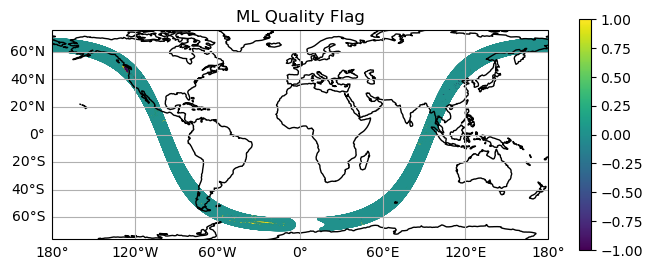

In [5]:
'''
Plot the flag
'''

data = local_functions.read_gmi_l1c(test_file)

chan = ['19H']

chan_desc = np.array(sensor_info.channel_descriptions)
chan_indx = np.where(chan == chan_desc)[0]

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
im = ax.scatter(data['lon'], data['lat'], c=mlflag[:,chan_indx], transform=ccrs.PlateCarree(), s=2.)
plt.colorbar(mappable=im, shrink=0.5)
plt.title('ML Quality Flag')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()
#ax.set_extent([-130,-120,40,57.5])
plt.show()

/tmp/ipykernel_837443/2363769029.py:37: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 2 Axes> than <Figure size 1200x400 with 4 Axes> which fig.colorbar is called on.
  cb = fig.colorbar(im, cax=cbar_ax)


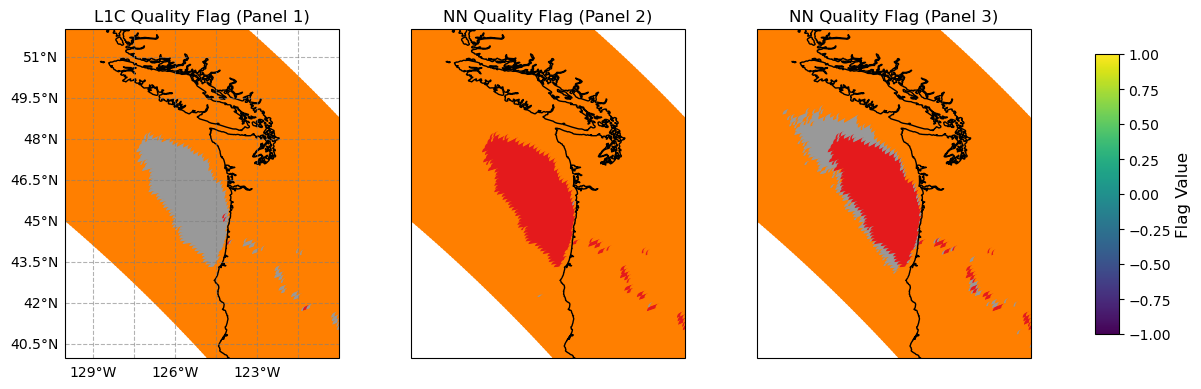

In [8]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4),
                         subplot_kw={'projection': ccrs.PlateCarree()})


colors = {
    '-1': 'midnightblue',
    '0': 'grey',
    '1': 'r',
    '2': 'yellow'
}

for ax in axes:
    ax.coastlines()
    ax.set_extent([-130, -120, 40, 52])

im1 = axes[0].scatter(data['lon'], data['lat'], c=data['qual'][:,:,0],
                    transform=ccrs.PlateCarree(), cmap='Set1')
im2 = axes[1].scatter(data['lon'], data['lat'], c=mlflag[:,0],
                    transform=ccrs.PlateCarree(), cmap='Set1')
im3 = axes[2].scatter(data['lon'], data['lat'], c=mlflag[:,1],
                    transform=ccrs.PlateCarree(), cmap='Set1')


gl = axes[0].gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.6, linestyle='--')
#gl = axes[0].gridlines(draw_labels=True, fontsize=1)
gl.right_labels = False
gl.top_labels = False
axes[0].set_title('L1C Quality Flag (Panel 1)')
axes[1].set_title('NN Quality Flag (Panel 2)')
axes[2].set_title('NN Quality Flag (Panel 3)')

# Adjust layout to make space for colorbar
plt.tight_layout(rect=[0, 0, 0.93, 1])

# Manually add colorbar axis (x0, y0, width, height)
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Flag Value', fontsize=12)

plt.show()


In [71]:
model_tree = model_operations.load_model_tree()
data = local_functions.read_gmi_l1c(test_file)
sfctype = local_functions.attach_gpm_sfctype(data['lat'], data['lon'], data['scantime'], sensor=sensor_info.sensor)
y_pred = model_operations.run_predictions(data['Tbs'], sfctype, model_tree)

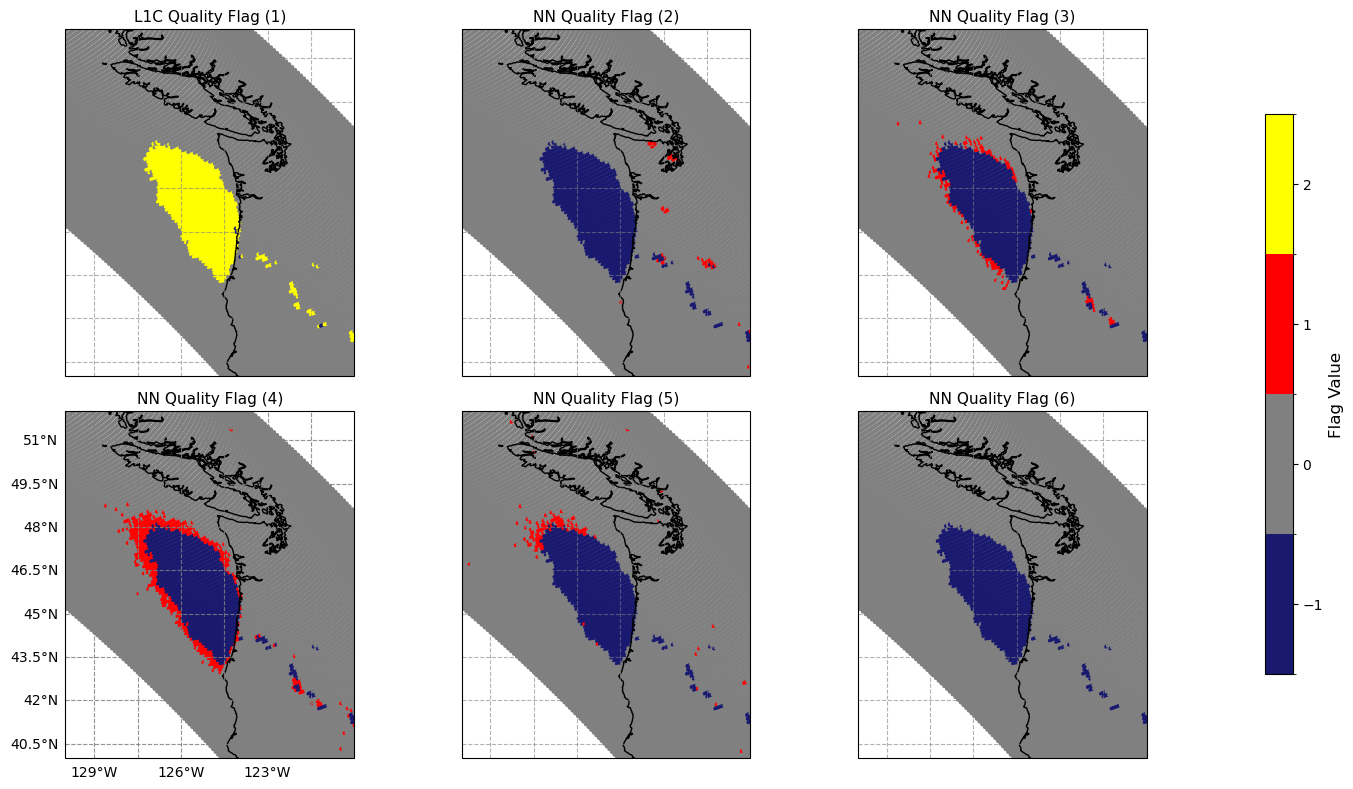

In [65]:

from matplotlib.colors import ListedColormap, BoundaryNorm

# Define your custom colors
colors = {
    -1: 'midnightblue',
     0: 'grey',
     1: 'red',
     2: 'yellow'
}

# Build discrete colormap and normalization
vals = list(colors.keys())
cmap = ListedColormap([colors[v] for v in vals])
norm = BoundaryNorm([v - 0.5 for v in vals] + [vals[-1] + 0.5], cmap.N)

# Create figure with 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(14, 8),
                         subplot_kw={'projection': ccrs.PlateCarree()})

axes = axes.flatten()

# Example plots — update variable indices to your actual data
im1 = axes[0].scatter(data['lon'], data['lat'], c=qual[:,:,0],
                      transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, s=4)
im2 = axes[1].scatter(data['lon'], data['lat'], c=mlflag[:,0],
                      transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, s=4)
im3 = axes[2].scatter(data['lon'], data['lat'], c=mlflag[:,5],
                      transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, s=4)
im4 = axes[3].scatter(data['lon'], data['lat'], c=mlflag[:,6],
                      transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, s=4)
im5 = axes[4].scatter(data['lon'], data['lat'], c=mlflag[:,8],
                      transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, s=4)
im6 = axes[5].scatter(data['lon'], data['lat'], c=mlflag[:,9],
                      transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, s=4)

# Add coastlines, extent, gridlines, and titles
titles = [
    'L1C Quality Flag (1)',
    'NN Quality Flag (2)',
    'NN Quality Flag (3)',
    'NN Quality Flag (4)',
    'NN Quality Flag (5)',
    'NN Quality Flag (6)'
]

for ax, title in zip(axes, titles):
    ax.coastlines()
    ax.set_extent([-130, -120, 40, 52])
    ax.set_title(title, fontsize=11)
    gl = ax.gridlines(draw_labels=False, linewidth=0.8, color='gray', alpha=0.6, linestyle='--')

# Add labels only to lower-left plot
gl = axes[3].gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.6, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Adjust layout for colorbar space
plt.tight_layout(rect=[0, 0, 0.93, 1])

# Shared colorbar on far right
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cb = fig.colorbar(im1, cax=cbar_ax, ticks=vals)
cb.set_label('Flag Value', fontsize=12)

plt.show()


In [87]:
import xarray as xr
file = '/edata1/archive/GPM/1C_TMI_V7/1209/120915/1C.TRMM.TMI.XCAL2021-V.20120915-S034717-E051940.084496.V07A.HDF5'

with xr.open_dataset(file, group='S1', decode_timedelta=False) as f:
    lat = f.Latitude.values
    lon = f.Longitude.values
    qual = f.Quality.values
    Tc = f.Tc.values

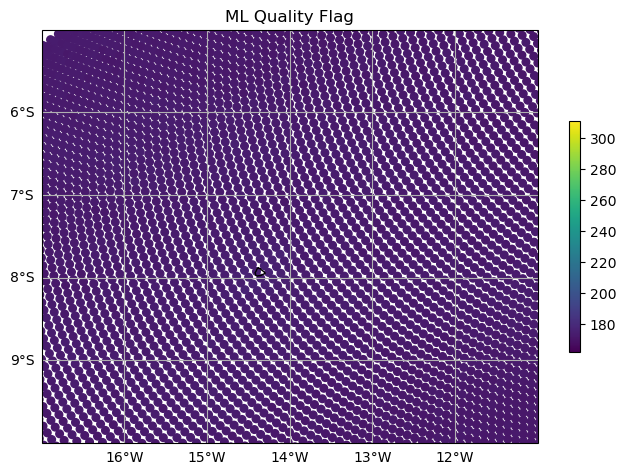

In [93]:

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
im = ax.scatter(lon, lat, c=Tc[:,:,0], transform=ccrs.PlateCarree(), s=30.)
#ax.scatter(-14.367, -7.934, color='dodgerblue', transform=ccrs.PlateCarree())
plt.colorbar(mappable=im, shrink=0.5)
plt.title('ML Quality Flag')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()
ax.set_extent([-17,-11,-10,-5])
plt.show()